In [1]:
from datetime import datetime, time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('youtube_statistics.xlsx')
df.head(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [4]:
df['trending_date']= pd.to_datetime(df['trending_date'])

In [5]:
cats = ['title', 'channel_title', 'tags', 'description']
nums = ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']

In [6]:
df[nums].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


# Univariate Analysis

In [7]:
# Extracting Year, Month, and Day
df['trending_year'] = df['trending_date'].dt.year
df['trending_month'] = df['trending_date'].dt.month
df['trending_day'] = df['trending_date'].dt.day

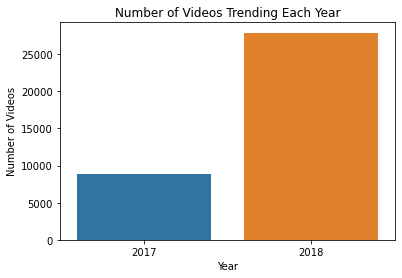

In [8]:
sns.countplot(x='trending_year', data=df)
plt.title('Number of Videos Trending Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Videos')
plt.show()

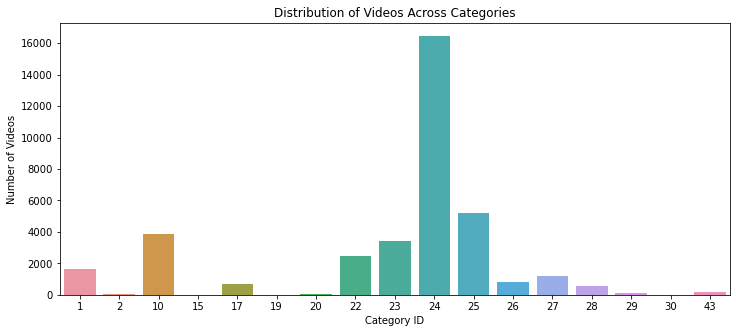

In [9]:
plt.figure(figsize=(12, 5))
sns.countplot(x='category_id', data=df)
plt.title('Distribution of Videos Across Categories')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.show()

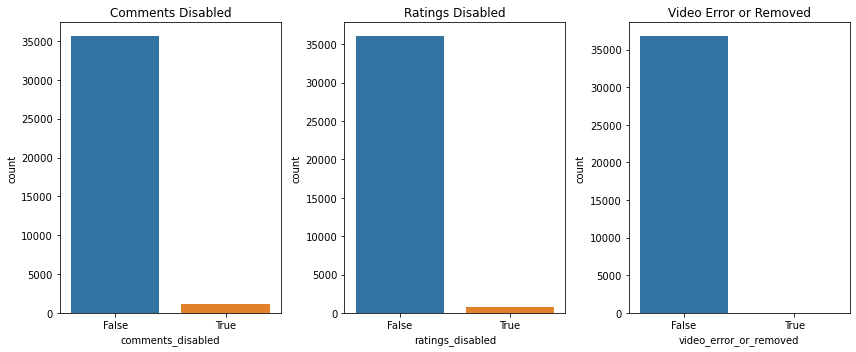

In [10]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# Comments Disabled
sns.countplot(x='comments_disabled', data=df, ax=axes[0])
axes[0].set_title('Comments Disabled')

# Ratings Disabled
sns.countplot(x='ratings_disabled', data=df, ax=axes[1])
axes[1].set_title('Ratings Disabled')

# Video Error or Removed
sns.countplot(x='video_error_or_removed', data=df, ax=axes[2])
axes[2].set_title('Video Error or Removed')

plt.tight_layout()
plt.show()

# Bivariate Analysis

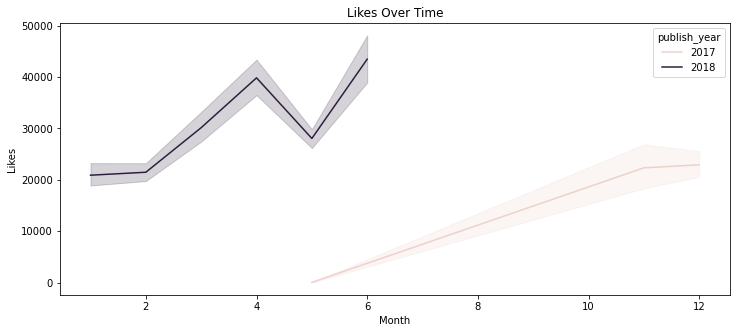

In [11]:
plt.figure(figsize=(12, 5))
df['publish_month'] = df['publish_date'].dt.month
df['publish_year'] = df['publish_date'].dt.year

# Line plot
sns.lineplot(x='publish_month', y='likes', hue='publish_year', data=df)
plt.title('Likes Over Time')
plt.xlabel('Month')
plt.ylabel('Likes')
plt.show()

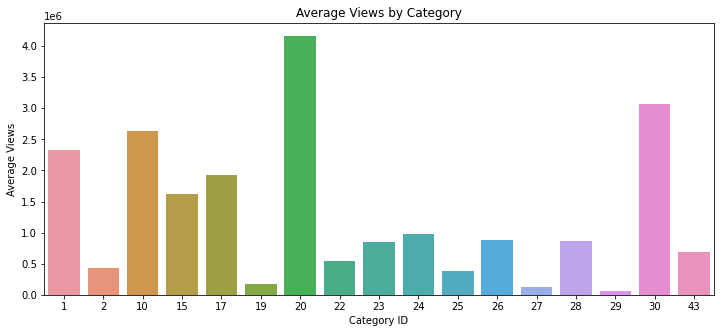

In [12]:
plt.figure(figsize=(12, 5))
df1 = df.groupby('category_id')['views'].mean().reset_index()
sns.barplot(x='category_id', y='views', data=df1)
plt.title('Average Views by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Views')
plt.show()

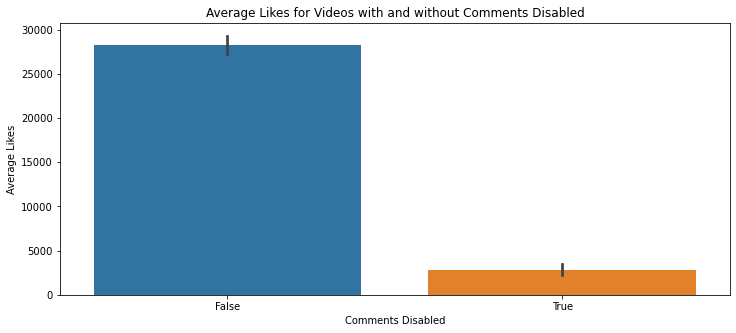

In [13]:
plt.figure(figsize=(12, 5))
sns.barplot(x='comments_disabled', y='likes', data=df)
plt.title('Average Likes for Videos with and without Comments Disabled')
plt.xlabel('Comments Disabled')
plt.ylabel('Average Likes')
plt.show()

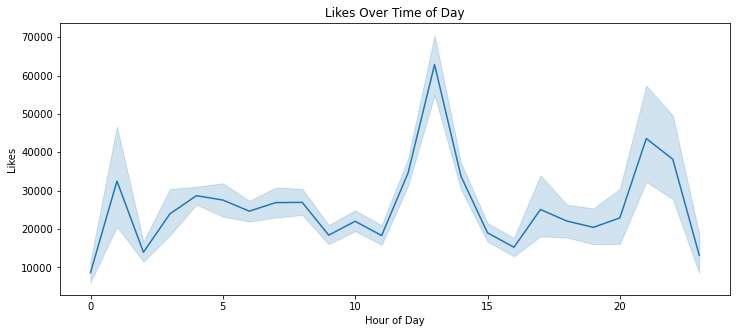

In [14]:
plt.figure(figsize=(12, 5))
df['publish_hour'] = pd.to_datetime(df['publish_time']).dt.hour

# Line plot
sns.lineplot(x='publish_hour', y='likes', data=df)
plt.title('Likes Over Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Likes')
plt.show()

# Multivariate Analysis

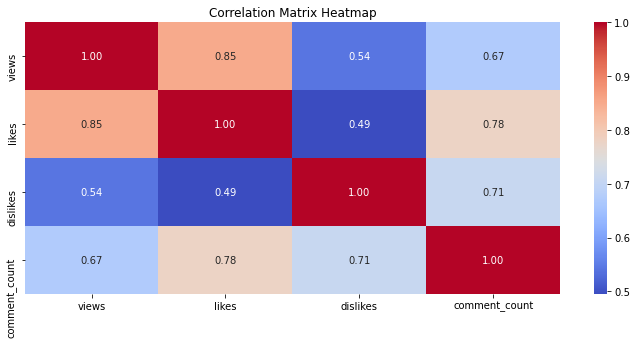

In [15]:
plt.figure(figsize=(12, 5))
# Select relevant numeric columns
numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']

# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()